# Triplet network model

# **Training with triplets dataset 2**

NOw, I am redoing my whole training and testing by modifying my triplets into an anchor image, a processed image (increasing contrast and decreaing brightness of the anchor image) and another random image from the same category. I created a folder 'new_train_data_pairs' where all the original images and the processed images from the training directory will be saved. Then I have another folder "new_validation_data_pairs" where the processed and original images from validation directory will be saved.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import random

In [ ]:
import os
os.chdir('/content/gdrive/MyDrive')

In [ ]:
# list of image paths from train directory
train_image_paths =[]
directory='/content/gdrive/MyDrive/new_train_directory'

for root, _, files in os.walk(directory):
    for filename in files:
        # Check if the file is an image (you can add more image file extensions)
        if filename.endswith('.jpg'):
            # Create the full path to the image
            file_path = os.path.join(root, filename)

            # Append the image path to the list
            train_image_paths.append(file_path)

In [ ]:
# function to process the images and save them to new folder

import cv2

def process_and_save_images(file_paths, output_dir):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for img_path in file_paths:
        # Load the image
        img = cv2.imread(img_path, 1)

        #adjusting the contrast and brightness
        alpha= 1.5
        beta=-120
        new_img =cv2.convertScaleAbs(img,alpha=alpha,beta=beta)


        # Get the filename from the path
        _, filename = os.path.split(img_path)

        # Save the original and processed images as pairs
        output_filename_original = os.path.join(output_dir, "original_" + filename)
        output_filename_processed = os.path.join(output_dir, "processed_" + filename)

        # Save the images
        cv2.imwrite(output_filename_original, img)
        cv2.imwrite(output_filename_processed, new_img)

In [ ]:
output_directory = '/content/gdrive/MyDrive/new_train_data_pairs'
image_files = os.listdir(directory)

In [ ]:
process_and_save_images(train_image_paths, output_directory)

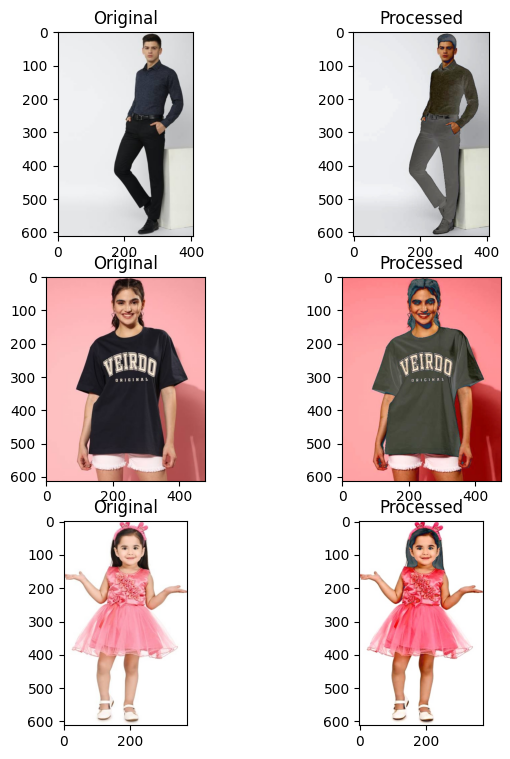

In [ ]:
directory = '/content/gdrive/MyDrive/new_train_data_pairs'
all_files = os.listdir(directory)

# Filter original and processed image pairs
original_files = [filename for filename in all_files if filename.startswith('original_')]
processed_files = [filename.replace('original_', 'processed_') for filename in original_files]
selected_indices = random.sample(range(len(original_files)), 3)

# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(7, 9))

# Loop through the selected pairs
for i, index in enumerate(selected_indices):
    original_filename = original_files[index]
    processed_filename = processed_files[index]

    img1_path = os.path.join(directory, original_filename)
    img2_path = os.path.join(directory, processed_filename)

    img1 = mpimg.imread(img1_path)
    img2 = mpimg.imread(img2_path)

    # Display the original and processed images side by side in the current row
    axes[i, 0].imshow(img1)
    axes[i, 0].set_title('Original')

    axes[i, 1].imshow(img2)
    axes[i, 1].set_title('Processed')

# Ensure proper layout

plt.show()

In [ ]:
valid_image_paths =[]
directory='/content/gdrive/MyDrive/new_valid_directory'

for root, _, files in os.walk(directory):
    for filename in files:
        # Check if the file is an image (you can add more image file extensions)
        if filename.endswith('.jpg'):
            # Create the full path to the image
            file_path = os.path.join(root, filename)

            # Append the image path to the list
            valid_image_paths.append(file_path)

In [ ]:
# processing images from validation directory and saving the original and processed images to new_valid_data_pairs:
output_directory= '/content/gdrive/MyDrive/new_validation_data_pairs'
process_and_save_images(valid_image_paths, output_directory)

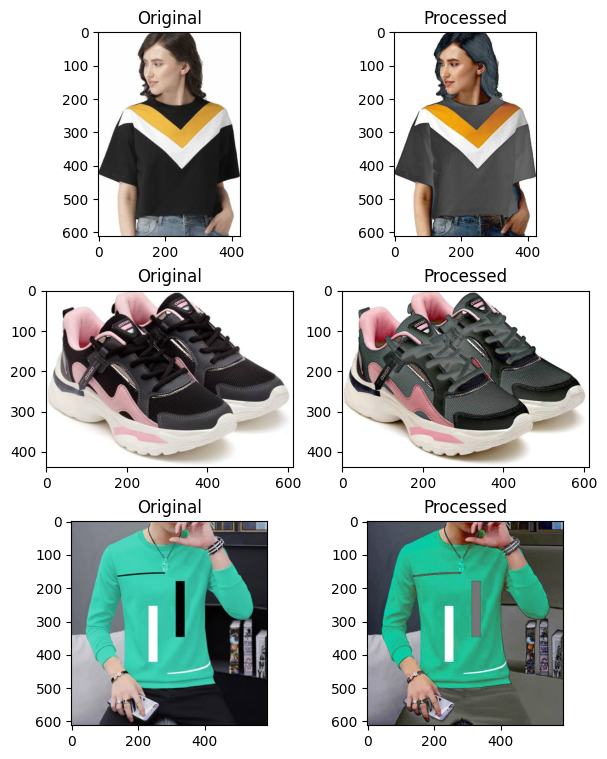

In [ ]:
directory = '/content/gdrive/MyDrive/new_validation_data_pairs'
all_files = os.listdir(directory)

# Filter original and processed image pairs
original_files = [filename for filename in all_files if filename.startswith('original_')]
processed_files = [filename.replace('original_', 'processed_') for filename in original_files]
selected_indices = random.sample(range(len(original_files)), 3)

# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(7, 9))

# Loop through the selected pairs
for i, index in enumerate(selected_indices):
    original_filename = original_files[index]
    processed_filename = processed_files[index]

    img1_path = os.path.join(directory, original_filename)
    img2_path = os.path.join(directory, processed_filename)

    img1 = mpimg.imread(img1_path)
    img2 = mpimg.imread(img2_path)

    # Display the original and processed images side by side in the current row
    axes[i, 0].imshow(img1)
    axes[i, 0].set_title('Original')

    axes[i, 1].imshow(img2)
    axes[i, 1].set_title('Processed')

# Ensure proper layout

plt.show()

Now, arranging the images as mentioned above into triplets by forming a list of image paths of triplets. Ech triplet will contain:
1. Anchor image (original)
2. positive counter image (edited or filtered image of the original image)
3. negative counter image (different image from same category)

In [ ]:
import os
import random
import re

# Specify the directory where your images are stored
image_directory = "/content/gdrive/MyDrive/new_train_data_pairs"

# Initialize empty lists to store the triplets
new_triplets = []
image_files=os.listdir(image_directory)
category_dict = {}

# Iterate through each file in the directory and group them by category
for filename in image_files:
    if filename.startswith("original"):
        # Extract the category name by splitting on numbers
        category = re.split(r'\d+', filename)[0]

        # Add the file path to the corresponding category in the dictionary
        category_dict.setdefault(category, []).append(os.path.join(image_directory, filename))

# Iterate through each file in the directory again to create triplets
for filename in image_files:
    if filename.startswith("original"):
        original_image_path = os.path.join(image_directory, filename)

        # Extract the corresponding sketch filename
        sketch_filename = filename.replace('original_', 'processed_')
        sketch_image_path = os.path.join(image_directory, sketch_filename)

        # Extract the category name from the filename
        category = re.split(r'\d+', filename)[0]
        # Get a list of categories other than the current one

        categories = [cat for cat in category_dict.keys() if cat == category]

        # Choose a random category from the list of other categories
        random_category = random.choice(categories)

       # Filter out processed images in the chosen category

        available_images = [img for img in category_dict[random_category]]

        # Randomly select a different original image
       # Remove the current original image

        random_original_filename = random.choice(available_images)

        while random_original_filename==filename or random_original_filename.startswith('processed'):
          random_original_filename = random.choice(available_images)


        random_original_image_path = os.path.join(image_directory, random_original_filename)

        new_triplets.append((original_image_path, sketch_image_path, random_original_image_path))


In [ ]:
len(new_triplets)

1448

In [ ]:
# forming list of imagepaths of triplets from validation directory

import os
import random
from PIL import Image
import re

# Specify the directory where your images are stored
image_directory = '/content/gdrive/MyDrive/new_validation_data_pairs'

# Initialize an empty list to store the triplets
new_validation_triplets = []

# List all files in the directory
all_files = os.listdir(image_directory)

# Iterate through each file in the directory
for filename in all_files:
    if filename.startswith('original'):
        original_image_path = os.path.join(image_directory, filename)

        # Extract the corresponding sketch filename
        sketch_filename = 'processed' + filename[len('original'):]
        sketch_image_path = os.path.join(image_directory, sketch_filename)

        # Extract the category name from the filename
        category = re.split(r'\d+', filename)[0] # Assumes the category name is separated by number

        # Filter files to get only original images from the same category
        same_category_files = [f for f in all_files if f.startswith(category)]

       # Randomly select a different original image from the same category
       # Remove the current original image

        random_original_filename = random.choice(same_category_files)

        while random_original_filename==filename or random_original_filename.startswith('processed') :
          random_original_filename = random.choice(same_category_files)

        random_original_image_path = os.path.join(image_directory, random_original_filename)



        # Append the triplet to the list
        new_validation_triplets.append((original_image_path, sketch_image_path, random_original_image_path))


# Now, the 'triplets' list contains tuples with paths to the original image, sketch image, and a random original image from the same category,

In [ ]:
len(new_triplets)

1448

In [ ]:
len(new_validation_triplets)

311

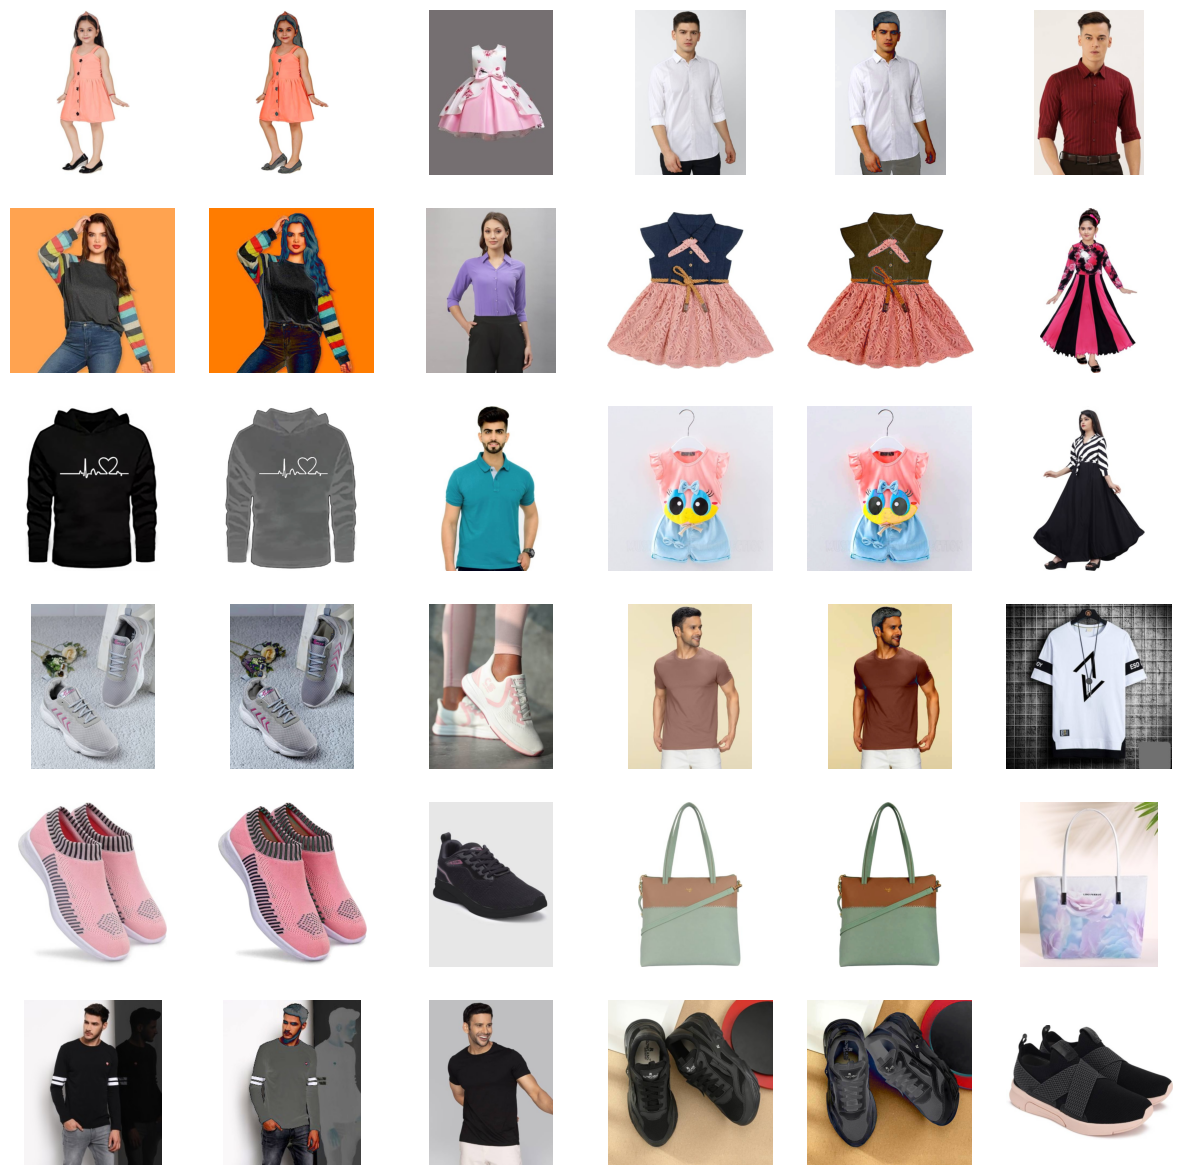

In [ ]:
#displaying images from triplets from training directory

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

random_triplets = random.sample(new_triplets, 12)

# Create subplots for the 12 triplets arranged as 6 per row and 6 rows
num_rows = 6  # 6 triplets per row
num_cols = 6
  # 2 triplets per column
plt.figure(figsize=(15, 15))  # Set the figure size

for i, triplet in enumerate(random_triplets):
    for j, image_path in enumerate(triplet):
        plt.subplot(num_rows, num_cols, i * 3 + j + 1)  # Create a subplot for each image

        img = mpimg.imread(image_path)  # Convert the PIL image to a numpy array
        plt.imshow(img)  # Display the image
        plt.axis('off')  # Turn off axis labels
plt.show()

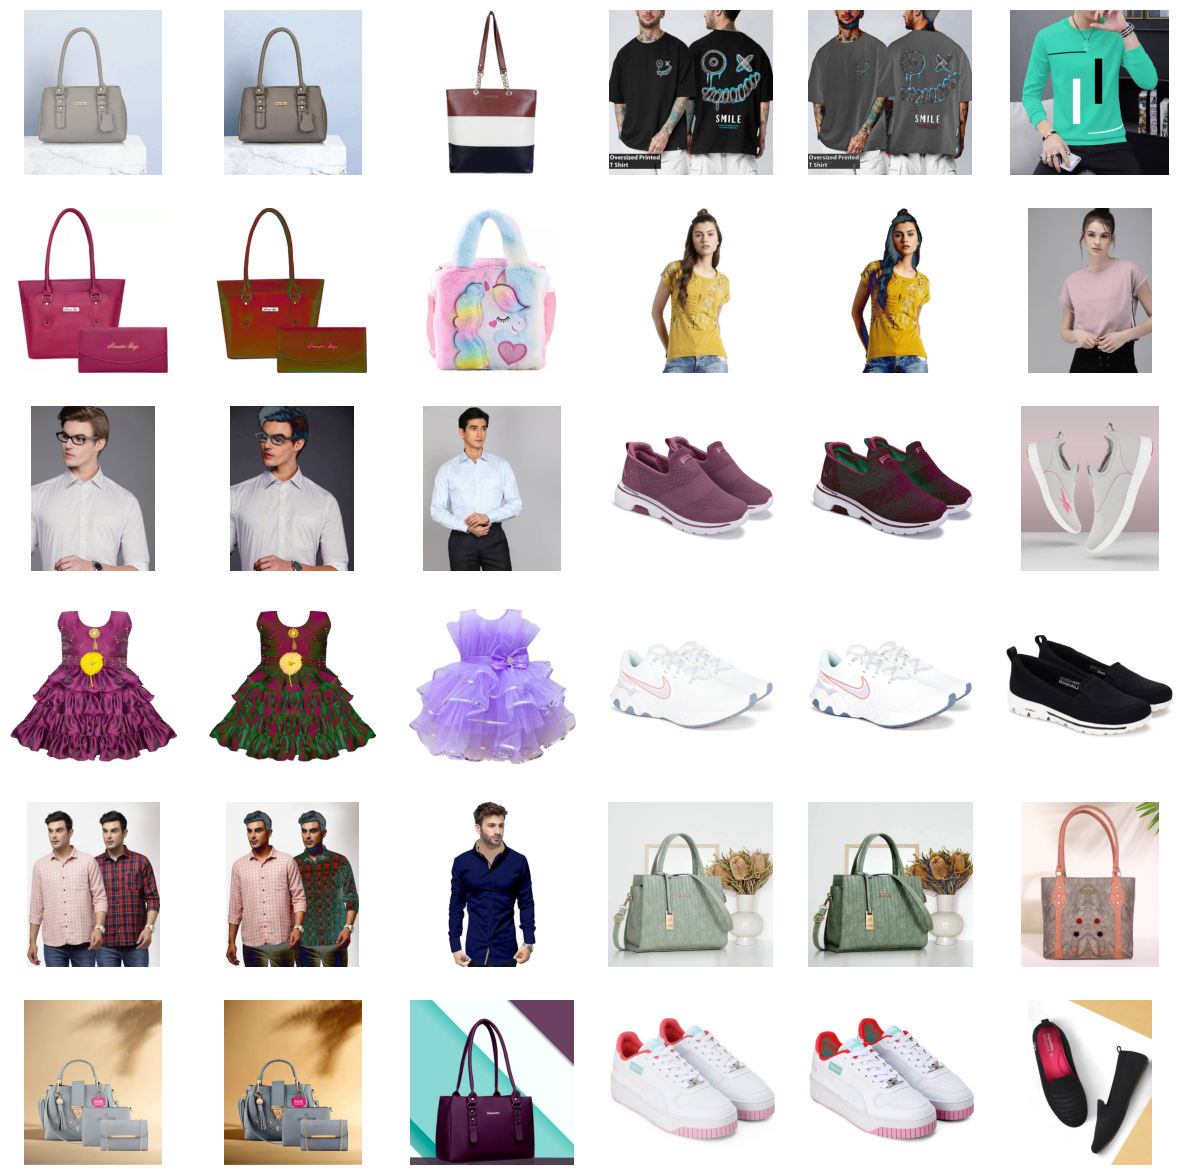

In [ ]:
#displaying images from triplets from validation directory

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

random_triplets = random.sample(new_validation_triplets, 12)

# Create subplots for the 12 triplets arranged as 6 per row and 6 rows
num_rows = 6  # 6 triplets per row
num_cols = 6
  # 2 triplets per column
plt.figure(figsize=(15, 15))  # Set the figure size

for i, triplet in enumerate(random_triplets):
    for j, image_path in enumerate(triplet):
        plt.subplot(num_rows, num_cols, i * 3 + j + 1)  # Create a subplot for each image

        img = mpimg.imread(image_path)  # Convert the PIL image to a numpy array
        plt.imshow(img)  # Display the image
        plt.axis('off')  # Turn off axis labels
plt.show()

Making a dataset class in python for the triplets and preprocessing them, getting ready for them to train the siamese model using Resnet50 which was pretrained on Imagnet dataset

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# Define a custom dataset class
class NewTripletDataset(Dataset):
    def __init__(self, triplets, transforms=None):
        self.triplets = triplets
        self.transforms = transforms

    def __len__(self):
        return len(self.triplets)

    def __getitem__(self, idx):
        original_path, sketch_path, random_path = self.triplets[idx]
        original_image = Image.open(original_path)
        sketch_image = Image.open(sketch_path)
        random_image = Image.open(random_path)


        original_image = self.transforms(original_image)
        sketch_image = self.transforms(sketch_image)
        random_image = self.transforms(random_image)

        return [original_image, sketch_image, random_image]

In [ ]:
# Function to preprocess the images for training and validation set

random_rotation = transforms.RandomRotation(degrees=40)

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
# Convert images to PyTorch tensors and rescale
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    # Rescalee images to the desired size of Resnet50
    random_rotation,
    transforms.ToTensor(),transforms.Normalize(mean=mean, std=std) ])

validation_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    # Rescalee images to the desired size of Resnet50,
    transforms.ToTensor(),transforms.Normalize(mean=mean, std=std) ])

In [ ]:
# Create a TripletDataset instance for trining set
train_dataset = NewTripletDataset(new_triplets, transforms=train_transforms)
validation_dataset = NewTripletDataset(new_validation_triplets, transforms=validation_transforms)



# Create a DataLoader to load the dataset in batches
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=16, shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size=16, shuffle=False, num_workers=2)

In [ ]:
#define the loss function
import torch.nn as nn

class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def calc_euclidean(self, x1, x2):              # Calculate euclidean distance between the images in a triplet
        distance=  (x1 - x2).pow(2).sum(1)
        return torch.sqrt(distance)
    # Distances in embedding space is calculated in euclidean
    def forward(self, anchor, positive, negative):
        distance_positive = self.calc_euclidean(anchor, positive)
        distance_negative = self.calc_euclidean(anchor, negative)
        losses = torch.relu(distance_positive - distance_negative + self.margin)           # triplet loss
        return losses.mean()

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
import torch.optim as optim



 # removed the last layer of Resnet50 to get the features
model_2 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model_2 = nn.Sequential(*list(model_2.children())[:-1])

In [ ]:
device = 'cuda'

model_2 = model_2.to(device)

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model_2.parameters(), lr=0.0001)
triplet_loss = TripletLoss()

In [ ]:
 from tqdm import tqdm

#iterate through the DataLoader to get batches of triplets
# Training
epochs=10
train_losses=[]
valid_losses=[]
for epoch in range(epochs):
    model_2.train()
    epoch_loss = 0.0

    for data in tqdm(train_loader):
        x1,x2,x3=data
        optimizer.zero_grad()
        e1 = model_2(x1.to(device))
        e2 = model_2(x2.to(device))
        e3 = model_2(x3.to(device))

        loss = triplet_loss(e1,e2,e3)
        epoch_loss += loss

        loss.backward()
        optimizer.step()
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss.item())

    model_2.eval()  # Set the model in evaluation mode
    valid_loss = 0.0

    with torch.no_grad():  # Disable gradient calculation for validation
        for data in tqdm(validation_loader):
            x1_val, x2_val, x3_val = data
            e1_val = model_2(x1_val.to(device))
            e2_val = model_2(x2_val.to(device))
            e3_val = model_2(x3_val.to(device))

            loss_val = triplet_loss(e1_val, e2_val, e3_val)
            valid_loss += loss_val
        valid_loss /= len(validation_loader.dataset)
        valid_losses.append(valid_loss.item())


     # Append the training and validation loss to the list

    print("Train Loss: {}".format(epoch_loss.item()))
    print("validation Loss: {}".format(valid_loss.item()))

100%|██████████| 20/20 [00:03<00:00,  5.90it/s]


Train Loss: 0.018240002915263176
validation Loss: 0.014860756695270538


100%|██████████| 20/20 [00:03<00:00,  5.85it/s]


Train Loss: 0.0051880995742976665
validation Loss: 0.009339663200080395


100%|██████████| 20/20 [00:03<00:00,  5.63it/s]


Train Loss: 0.0040042344480752945
validation Loss: 0.006982265040278435


100%|██████████| 20/20 [00:03<00:00,  5.87it/s]


Train Loss: 0.002565117785707116
validation Loss: 0.001419318257831037


100%|██████████| 20/20 [00:03<00:00,  5.89it/s]


Train Loss: 0.002351390430703759
validation Loss: 0.0018665387760847807


100%|██████████| 20/20 [00:03<00:00,  5.62it/s]


Train Loss: 0.0020306690130382776
validation Loss: 0.0028057903982698917


100%|██████████| 20/20 [00:03<00:00,  5.77it/s]


Train Loss: 0.007275622338056564
validation Loss: 0.0049683572724461555


100%|██████████| 20/20 [00:03<00:00,  5.81it/s]


Train Loss: 0.0024545323103666306
validation Loss: 0.0037533827126026154


100%|██████████| 20/20 [00:03<00:00,  5.75it/s]


Train Loss: 0.0017317679012194276
validation Loss: 0.003518023993819952


100%|██████████| 20/20 [00:03<00:00,  5.83it/s]

Train Loss: 0.000809708028100431
validation Loss: 0.002631538547575474


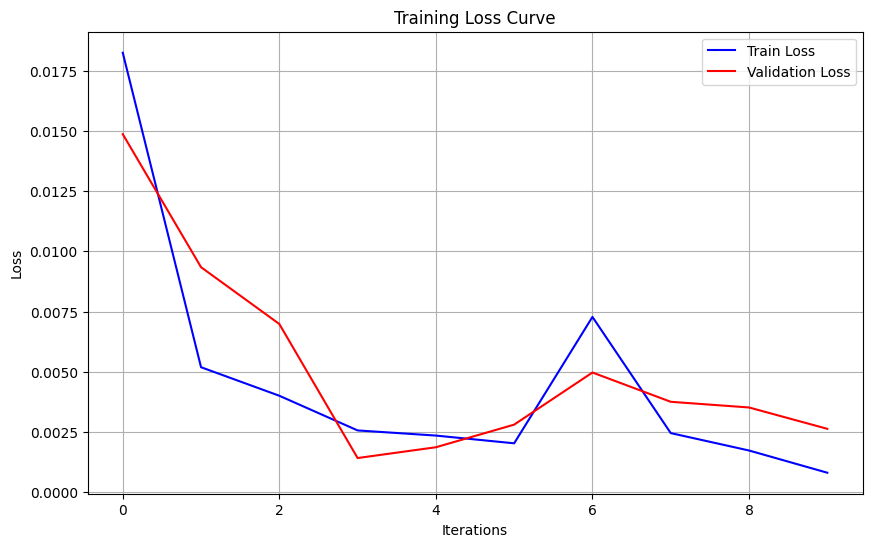

In [ ]:
# LOSS Learning curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_losses)),train_losses,'b', label='Train Loss')
plt.plot(range(len(valid_losses)),valid_losses,'r',label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
 #save the model
torch.save(model_2.state_dict(), 'pytorch_model5.pth')

Retrieval: First, use the fine-tuned model to extract features from the images in the train directory and storing them to embeddings

In [ ]:
# Preprocess images and extract feature vectors from images in train_directory
import glob
# Initialize lists to store feature vectors and image file paths
np_features = []                 #features
im_indices = []                  # indices: file paths of the images
model_2.eval()
with torch.no_grad():
     for f in glob.glob(os.path.join('/content/gdrive/MyDrive/new_train_directory', '*/*')):
        im = Image.open(f)
        im = im.resize((224, 224))
        im_tensor = torch.tensor([validation_transforms(im).numpy()]).cuda()

        # Extract feature vector using your model
        feature_vector = model_2(im_tensor).cpu().numpy()

        # Store the feature vector and image path
        np_features.append(feature_vector)
        im_indices.append(f)

In [ ]:
import numpy as np
np_features_1 = np.array(np_features)
# Reshape np_features to 2D
np_features_2 = np_features_1.reshape(np_features_1.shape[0], -1)

In [ ]:
# Fit the model to feature vectors in train directory

from sklearn.neighbors import NearestNeighbors
import numpy as np
from PIL import Image
import os
import torch
import matplotlib.pyplot as plt



# Initialize the NearestNeighbors model
n_neighbors = 10 # Number of nearest neighbors to retrieve
nn_model = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')

nn_model.fit(np_features_2)

NearestNeighbors(metric='euclidean', n_neighbors=10)

In [ ]:
directory_path= '/content/gdrive/MyDrive/Testing_directory/Kids_Dresses'
for i in os.listdir(directory_path):
  query_image_path=os.path.join(directory_path,i)
  model_2.eval()
  with torch.no_grad():
    query_im = Image.open(query_image_path)
    query_im = query_im.resize((224, 224))

    query_vec = model_2(torch.tensor([validation_transforms(query_im).numpy()]).cuda()).cpu().numpy()
    distances, indices = nn_model.kneighbors(query_vec.reshape(1, -1))

# 'distances' contains the distances to the nearest neighbors
# 'indices' contains the indices of the nearest neighbors in np_features



# Display the query and retrieved images
    plt.figure(figsize=(20, 15))

# Display the query image
    plt.subplot(1, n_neighbors + 1, 1)

    plt.imshow(Image.open(query_image_path))
    plt.title("Query Image")
    plt.axis("off")

# Display the retrieved images
    for i, idx in enumerate(indices[0]):
      retrieved_image_path = im_indices[idx]
      retrieved_image = Image.open(retrieved_image_path)

      plt.subplot(1, n_neighbors + 1, i + 2)

      plt.imshow(retrieved_image)
      plt.title(f"Retrieved {i + 1}")
      plt.axis("off")

plt.show()

In [ ]:
directory_path= '/content/gdrive/MyDrive/Testing_directory/Ladies_Top'
for i in os.listdir(directory_path):
  query_image_path=os.path.join(directory_path,i)
  model_2.eval()
  with torch.no_grad():
    query_im = Image.open(query_image_path)
    query_im = query_im.resize((224, 224))

    query_vec = model_2(torch.tensor([validation_transforms(query_im).numpy()]).cuda()).cpu().numpy()
    distances, indices = nn_model.kneighbors(query_vec.reshape(1, -1))

# 'distances' contains the distances to the nearest neighbors
# 'indices' contains the indices of the nearest neighbors in np_features



# Display the query and retrieved images
    plt.figure(figsize=(20, 15))

# Display the query image
    plt.subplot(1, n_neighbors + 1, 1)

    plt.imshow(Image.open(query_image_path))
    plt.title("Query Image")
    plt.axis("off")

# Display the retrieved images
    for i, idx in enumerate(indices[0]):
      retrieved_image_path = im_indices[idx]
      retrieved_image = Image.open(retrieved_image_path)

      plt.subplot(1, n_neighbors + 1, i + 2)

      plt.imshow(retrieved_image)
      plt.title(f"Retrieved {i + 1}")
      plt.axis("off")
plt.show()

In [ ]:
directory_path= "/content/gdrive/MyDrive/Testing_directory/Men's_Shirts"
for i in os.listdir(directory_path):
  query_image_path=os.path.join(directory_path,i)
  model_2.eval()
  with torch.no_grad():
    query_im = Image.open(query_image_path)
    query_im = query_im.resize((224, 224))

    query_vec = model_2(torch.tensor([validation_transforms(query_im).numpy()]).cuda()).cpu().numpy()
    distances, indices = nn_model.kneighbors(query_vec.reshape(1, -1))

# 'distances' contains the distances to the nearest neighbors
# 'indices' contains the indices of the nearest neighbors in np_features



# Display the query and retrieved images
    plt.figure(figsize=(20, 15))

# Display the query image
    plt.subplot(1, n_neighbors + 1, 1)

    plt.imshow(Image.open(query_image_path))
    plt.title("Query Image")
    plt.axis("off")

# Display the retrieved images
    for i, idx in enumerate(indices[0]):
      retrieved_image_path = im_indices[idx]
      retrieved_image = Image.open(retrieved_image_path)

      plt.subplot(1, n_neighbors + 1, i + 2)

      plt.imshow(retrieved_image)
      plt.title(f"Retrieved {i + 1}")
      plt.axis("off")
plt.show

In [ ]:
directory_path= '/content/gdrive/MyDrive/Testing_directory/Shoes'
for i in os.listdir(directory_path):
  query_image_path=os.path.join(directory_path,i)
  model_2.eval()
  with torch.no_grad():
    query_im = Image.open(query_image_path)
    query_im = query_im.resize((224, 224))

    query_vec = model_2(torch.tensor([validation_transforms(query_im).numpy()]).cuda()).cpu().numpy()
    distances, indices = nn_model.kneighbors(query_vec.reshape(1, -1))

# 'distances' contains the distances to the nearest neighbors
# 'indices' contains the indices of the nearest neighbors in np_features



# Display the query and retrieved images
    plt.figure(figsize=(20, 15))

# Display the query image
    plt.subplot(1, n_neighbors + 1, 1)

    plt.imshow(Image.open(query_image_path))
    plt.title("Query Image")
    plt.axis("off")

# Display the retrieved images
    for i, idx in enumerate(indices[0]):
      retrieved_image_path = im_indices[idx]
      retrieved_image = Image.open(retrieved_image_path)

      plt.subplot(1, n_neighbors + 1, i + 2)

      plt.imshow(retrieved_image)
      plt.title(f"Retrieved {i + 1}")
      plt.axis("off")
plt.show

In [ ]:
directory_path= '/content/gdrive/MyDrive/Testing_directory/T_Shirts'
for i in os.listdir(directory_path):
  query_image_path=os.path.join(directory_path,i)
  model_2.eval()
  with torch.no_grad():
    query_im = Image.open(query_image_path)
    query_im = query_im.resize((224, 224))

    query_vec = model_2(torch.tensor([validation_transforms(query_im).numpy()]).cuda()).cpu().numpy()
    distances, indices = nn_model.kneighbors(query_vec.reshape(1, -1))

# 'distances' contains the distances to the nearest neighbors
# 'indices' contains the indices of the nearest neighbors in np_features



# Display the query and retrieved images
    plt.figure(figsize=(20, 15))

# Display the query image
    plt.subplot(1, n_neighbors + 1, 1)

    plt.imshow(Image.open(query_image_path))
    plt.title("Query Image")
    plt.axis("off")

# Display the retrieved images
    for i, idx in enumerate(indices[0]):
      retrieved_image_path = im_indices[idx]
      retrieved_image = Image.open(retrieved_image_path)

      plt.subplot(1, n_neighbors + 1, i + 2)

      plt.imshow(retrieved_image)
      plt.title(f"Retrieved {i + 1}")
      plt.axis("off")
plt.show

In [ ]:
directory_path= '/content/gdrive/MyDrive/Testing_directory/hand_bags'
for i in os.listdir(directory_path):
  query_image_path=os.path.join(directory_path,i)
  model_2.eval()
  with torch.no_grad():
    query_im = Image.open(query_image_path)
    query_im = query_im.resize((224, 224))

    query_vec = model_2(torch.tensor([validation_transforms(query_im).numpy()]).cuda()).cpu().numpy()
    distances, indices = nn_model.kneighbors(query_vec.reshape(1, -1))

# 'distances' contains the distances to the nearest neighbors
# 'indices' contains the indices of the nearest neighbors in np_features



# Display the query and retrieved images
    plt.figure(figsize=(20, 15))

# Display the query image
    plt.subplot(1, n_neighbors + 1, 1)

    plt.imshow(Image.open(query_image_path))
    plt.title("Query Image")
    plt.axis("off")

# Display the retrieved images
    for i, idx in enumerate(indices[0]):
      retrieved_image_path = im_indices[idx]
      retrieved_image = Image.open(retrieved_image_path)

      plt.subplot(1, n_neighbors + 1, i + 2)

      plt.imshow(retrieved_image)
      plt.title(f"Retrieved {i + 1}")
      plt.axis("off")
plt.show